<a href="https://colab.research.google.com/github/RehabEmam228/Bertlesmann-challenge/blob/master/face_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

In [2]:
import os
import urllib.request

# Getting the image and the Haar Cascade
urllib.request.urlretrieve('https://i.ibb.co/s2DYF3M/faces.jpg', './faces.jpg')
urllib.request.urlretrieve('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml', 
                           'haarcascade_frontalface_default.xml')

os.listdir()

['.config', 'faces.jpg', 'haarcascade_frontalface_default.xml', 'sample_data']

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread('/content/drive/My Drive/faces.jpg')

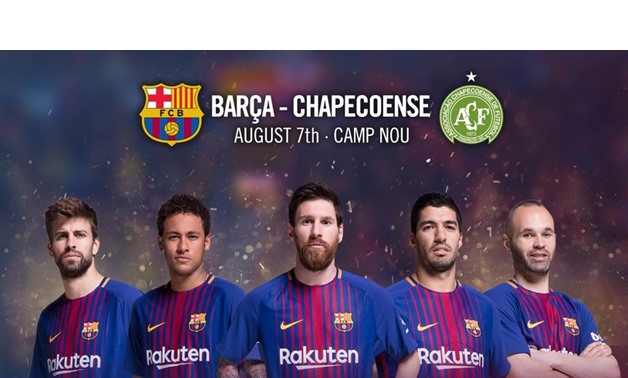

In [12]:
scale = 20
width =int(img.shape[1]) #*scale/100)
height = int(img.shape[0])#*scale/100) 
dim = (width, height)
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(resized)

In [0]:
faces = face_cascade.detectMultiScale(resized, scaleFactor = 1.5, minNeighbors = 5, minSize=(30, 30))

In [14]:
faces

array([[294, 204,  45,  45],
       [ 49, 218,  45,  45],
       [417, 209,  45,  45],
       [161, 220,  45,  45],
       [516, 217,  45,  45],
       [283, 196,  68,  68],
       [405, 200,  68,  68],
       [505, 206,  68,  68],
       [149, 210,  68,  68]], dtype=int32)

In [0]:
copied_img = resized.copy()
maskshape = (resized.shape[0], resized.shape[1], 1)
mask = np.full(maskshape, 0, dtype=np.uint8)

In [0]:
for (x, y, w, h) in faces:
  x_center = x + (w/2).astype(int)
  y_center = y + (h/2).astype(int)
  copied_img[y:y+h, x:x+w] = cv2.blur(copied_img[y:y+h, x:x+w],(50, 50))

  cv2.circle(copied_img, (x_center, y_center), int(h/2), (64, 0, 0))
  cv2.circle(mask, (int((x+x+w)/2),int((y+y+h)/2)), int(h/2), (64, 0, 0), -1)


In [0]:
mask_inv = cv2.bitwise_not(mask)
background_img = cv2.bitwise_and(copied_img, copied_img, mask = mask_inv)
foreground_img = cv2.bitwise_and(copied_img, copied_img, mask = mask)
newimage = cv2.add(background_img, foreground_img)



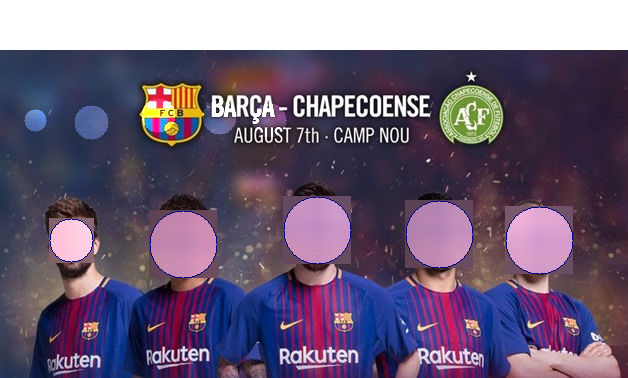

In [51]:
cv2_imshow(newimage)

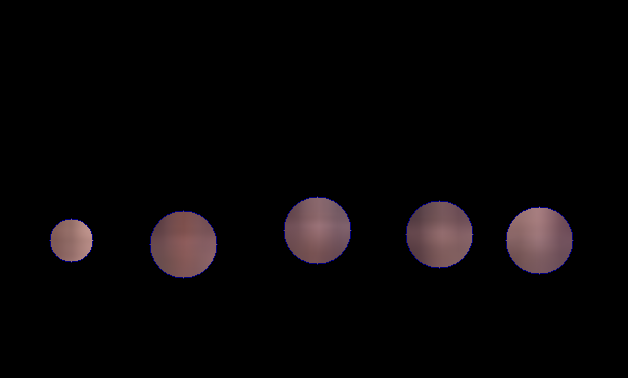

In [32]:
cv2_imshow(foreground_img)

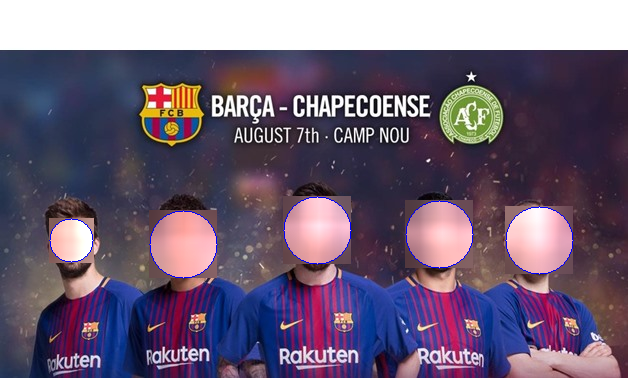

In [39]:
newimage = cv2.add(copied_img, foreground_img)
cv2_imshow(newimage)